In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
import re
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk import pos_tag, pos_tag_sents

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
import tensorflow as tf
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.corpus import stopwords, wordnet as wn
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
import pandas as pd

# Download necessary NLTK data
nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('sentiwordnet', quiet=True)

True

In [2]:
df=pd.read_csv('medical_df.csv')

In [3]:
df.shape

(12492, 58)

In [4]:
df = df[['address', 'business_id', 'categories', 'city', 'is_open', 'latitude',
       'longitude', 'name', 'postal_code', 'review_count', 'stars', 'state']]

In [5]:
df.shape

(12492, 12)

In [6]:
df = df[df['is_open']!=0]

In [7]:
df.shape

(11522, 12)

In [8]:
df.shape

(11522, 12)

In [9]:
#df.isnull().sum()

In [10]:
df.dropna(subset=['address'],inplace=True)

In [11]:
df.shape

(11358, 12)

In [12]:
df['review_count'].value_counts().head(18)

review_count
5     1648
6     1237
7     1037
8      886
9      716
10     589
11     483
12     434
13     377
14     343
15     260
16     240
17     237
18     186
19     175
20     156
21     154
22     139
Name: count, dtype: int64

In [13]:
counts = df['review_count'].value_counts()

In [14]:
above1000 = counts.nlargest(17).index

In [15]:
above1000

Index([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], dtype='int64', name='review_count')

In [16]:
df = df[df['review_count'].isin(above1000)]

In [17]:
df.columns

Index(['address', 'business_id', 'categories', 'city', 'is_open', 'latitude',
       'longitude', 'name', 'postal_code', 'review_count', 'stars', 'state'],
      dtype='object')

In [18]:
df['name'].value_counts().nlargest(12)

name
CVS Pharmacy                            286
Quest Diagnostics                        71
Smoothie King                            67
Labcorp                                  64
LensCrafters                             39
America's Best Contacts & Eyeglasses     36
MyEyeDr                                  28
Aspen Dental                             26
Pearle Vision                            23
Target Optical                           20
The Joint Chiropractic                   20
Clarkson Eyecare                         19
Name: count, dtype: int64

In [19]:
df_f = df[~df['name'].str.contains('Smoothie King')]

In [20]:
df_f['name'].value_counts().nlargest(12)

name
CVS Pharmacy                            286
Quest Diagnostics                        71
Labcorp                                  64
LensCrafters                             39
America's Best Contacts & Eyeglasses     36
MyEyeDr                                  28
Aspen Dental                             26
Pearle Vision                            23
Target Optical                           20
The Joint Chiropractic                   20
Clarkson Eyecare                         19
Coast Dental                             15
Name: count, dtype: int64

In [21]:
top10=df_f['name'].value_counts().nlargest(10).index

In [22]:
df = df_f[df_f['name'].isin(top10)]

In [23]:
df['review_count'].value_counts()

review_count
5     82
6     72
7     69
10    58
8     51
9     43
11    42
13    40
12    37
15    21
14    20
17    18
16    17
18    14
20    11
21    10
19     8
Name: count, dtype: int64

In [24]:
df.shape

(613, 12)

In [25]:
df['stars'].value_counts()

stars
2.5    136
2.0    132
3.0    119
3.5     70
1.5     60
4.0     45
4.5     22
1.0     19
5.0     10
Name: count, dtype: int64

In [26]:
dfr=pd.read_csv('three.csv',on_bad_lines='skip')

C:\Users\Kunal Karne\AppData\Local\Temp\ipykernel_17296\424199937.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  dfr=pd.read_csv('three.csv',on_bad_lines='skip')


In [27]:
dfr.columns

Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text',
       'useful', 'user_id'],
      dtype='object')

In [27]:
# dfr.dropna(subset=['user_id'],inplace=True)
# dfr.dropna(subset=['useful'],inplace=True)
# dfr.dropna(subset=['review_id'],inplace=True)
# dfr.dropna(subset=['date'],inplace=True)
# dfr.dropna(subset=['stars'],inplace=True)
# dfr.dropna(subset=['text'],inplace=True)
# dfr.dropna(subset=['funny'],inplace=True)
# dfr.dropna(subset=['business_id'],inplace=True)
# dfr.dropna(subset=['cool'],inplace=True)
dfr.dropna(inplace=True)

In [28]:
dfr.shape

(6657582, 9)

In [29]:
def downsize_review(review, business1):
    temp = business1['business_id'].tolist()
    review1 = review[review['business_id'].isin(temp)]
    review1 = review1[['business_id','review_id','user_id', 'stars', 'text']]
    review2 = review1.reset_index(drop=True)
    return review2

dfr = downsize_review(dfr, df)
dfr.shape

(5964, 5)

In [30]:
dfr.shape

(5964, 5)

In [31]:
dfrb = pd.merge(df, dfr, on='business_id', how='left')

In [32]:
dfrb.columns

Index(['address', 'business_id', 'categories', 'city', 'is_open', 'latitude',
       'longitude', 'name', 'postal_code', 'review_count', 'stars_x', 'state',
       'review_id', 'user_id', 'stars_y', 'text'],
      dtype='object')

In [33]:
dfrb.rename(columns = {'stars_x':'business_ratings','stars_y':'user_ratings','date':'review_date'},inplace=True)

In [34]:
dfrb.columns

Index(['address', 'business_id', 'categories', 'city', 'is_open', 'latitude',
       'longitude', 'name', 'postal_code', 'review_count', 'business_ratings',
       'state', 'review_id', 'user_id', 'user_ratings', 'text'],
      dtype='object')

In [35]:
dfrb = dfrb.drop('is_open',axis=1)

In [36]:
dfrb.shape

(5964, 15)

In [37]:
dfrb = dfrb.drop('categories',axis=1)

In [38]:
dfrb.head()

,address,business_id,city,latitude,longitude,name,postal_code,review_count,business_ratings,state,review_id,user_id,user_ratings,text
0,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,I3oh-81HYdkMTtkXveV-Sw,wJv4kT5w8nFxaO7whi56pw,4.0,Great job of adjusting glasses.
1,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,l8l3uVqhBbRiL8ET7Aoj2g,57HSDfo7xQGtjICR1dDOpw,1.0,After purchasing two pairs of glasses at the L...
2,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,TaHKpMreaYNb0MbDh6l3nQ,vrKkXsozqqecF3CW4cGaVQ,5.0,I actually had a great experience at this lens...
3,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,BZGZKiRT1WovkwlcfocuoQ,NMaHUBl_u5iVCC5MYUdqXw,5.0,I originally had an eye exam at KOP Lenscrafte...
4,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,_yheryD7Rx0JHNxXDMiSkw,QVIHwBT1KDnLgtisSP08aQ,1.0,Today was the second terrible experience I've ...


In [39]:
dfc=pd.read_csv('four.csv')

In [40]:
def downsize_checkin(checkin, business1):
    temp = business1['business_id'].tolist()
    checkin1 = checkin[checkin['business_id'].isin(temp)]
    checkin2 = checkin1.groupby('business_id').sum().reset_index()
    return checkin2

dfc = downsize_checkin(dfc, dfrb)
dfc.head()
dfc.shape

(579, 2)

In [41]:
dfc['checkins'] = dfc['date'].apply(lambda x: len(x.strip(', ').split(', ')) if x.strip(', ') else 0)

In [42]:
dfc = dfc.drop('date',axis=1)

In [43]:
len(dfc[dfc['checkins'] < 1]) 

0

In [44]:
dfrbc = pd.merge(dfrb,dfc,how='left',on='business_id')

In [45]:
dfrbc.shape

(5964, 15)

In [46]:
dfrbc.columns

Index(['address', 'business_id', 'city', 'latitude', 'longitude', 'name',
       'postal_code', 'review_count', 'business_ratings', 'state', 'review_id',
       'user_id', 'user_ratings', 'text', 'checkins'],
      dtype='object')

In [47]:
dfrbc.head()

,address,business_id,city,latitude,longitude,name,postal_code,review_count,business_ratings,state,review_id,user_id,user_ratings,text,checkins
0,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,I3oh-81HYdkMTtkXveV-Sw,wJv4kT5w8nFxaO7whi56pw,4.0,Great job of adjusting glasses.,38.0
1,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,l8l3uVqhBbRiL8ET7Aoj2g,57HSDfo7xQGtjICR1dDOpw,1.0,After purchasing two pairs of glasses at the L...,38.0
2,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,TaHKpMreaYNb0MbDh6l3nQ,vrKkXsozqqecF3CW4cGaVQ,5.0,I actually had a great experience at this lens...,38.0
3,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,BZGZKiRT1WovkwlcfocuoQ,NMaHUBl_u5iVCC5MYUdqXw,5.0,I originally had an eye exam at KOP Lenscrafte...,38.0
4,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,_yheryD7Rx0JHNxXDMiSkw,QVIHwBT1KDnLgtisSP08aQ,1.0,Today was the second terrible experience I've ...,38.0


In [48]:
dfrbc.columns

Index(['address', 'business_id', 'city', 'latitude', 'longitude', 'name',
       'postal_code', 'review_count', 'business_ratings', 'state', 'review_id',
       'user_id', 'user_ratings', 'text', 'checkins'],
      dtype='object')

In [49]:
dft = pd.read_csv('five.csv',on_bad_lines='skip')

In [50]:
dft.columns

Index(['business_id', 'compliment_count', 'date', 'text', 'user_id'], dtype='object')

In [51]:
dft.shape

(906622, 5)

In [52]:
def downsize_tip(tip, business1):
    temp = business1['business_id'].tolist()
    tip1 = tip[tip['business_id'].isin(temp)]
    tip1 = tip1[['business_id','text']]
    tip2 = tip1.reset_index(drop=True)
    return tip2
    
dft = downsize_tip(dft, dfrbc)
dft.shape

(757, 2)

In [53]:
class CleaningPipeline:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def remove_non_ascii(self, text):
        return ''.join(char for char in text if ord(char) < 128)

    def remove_whitespace_and_special_chars(self, text):
        return re.sub(r'\s+', ' ', re.sub(r'[^\w\s]', '', text)).strip()

    def remove_numerics(self, text):
        return re.sub(r'\d+', '', text)

    def remove_stop_words(self, text):
        return ' '.join(word for word in text.split() if word.lower() not in self.stop_words)

    def word_lemmatization(self, text):
        return ' '.join(self.lemmatizer.lemmatize(word) for word in text.split())

    def clean_text(self, text):
        text = re.sub(r'<br />', ' ', text)
        text = re.sub(r'<[^>]+>', '', text)
        text = text.lower()
        text = re.sub(r'\W', ' ', text)
        return text

    def convert_tag(self, tag):
        tag_dict = {'N': 'n', 'J': 'a', 'R': 'r', 'V': 'v'}
        try:
            return tag_dict[tag[0]]
        except KeyError:
            return None

    def compute_sentiment_score(self, text):
        sentiment_score = 0
        tokens_count = 0

        cleaned_text = self.clean_text(text)
        sentences = sent_tokenize(cleaned_text)

        for sentence in sentences:
            tagged_words = nltk.pos_tag(word_tokenize(sentence))

            for word, tag in tagged_words:
                wn_tag = self.convert_tag(tag)
                if wn_tag not in ('n', 'a', 'r', 'v'):
                    continue

                lemma = self.lemmatizer.lemmatize(word, pos=wn_tag)
                if not lemma:
                    continue

                synsets = wn.synsets(lemma, pos=wn_tag)
                if not synsets:
                    continue

                swn_synset = swn.senti_synset(synsets[0].name())
                sentiment_score += swn_synset.pos_score() - swn_synset.neg_score()
                tokens_count += 1

        if tokens_count == 0:
            return 0

        final_score = sentiment_score / tokens_count

        if final_score > 0:
            return 1  # Positive
        else:
            return 0  # Neutral or Negative

    def transform(self, text):
        text = self.remove_non_ascii(text)
        text = self.remove_whitespace_and_special_chars(text)
        text = self.remove_numerics(text)
        text = self.remove_stop_words(text)
        text = self.word_lemmatization(text)
        sentiment = self.compute_sentiment_score(text)
        return text, sentiment

In [54]:
pipeline = CleaningPipeline()
dfrbc['cleaned_text'], dfrbc['polarity'] = zip(*dfrbc['text'].apply(pipeline.transform))

print(dfrbc.head())

                                address             business_id  \
0  1150 Plymouth Meeting Mall, Ste 2230  DQ7PyYlp2bX96WZa7TcaWQ   
1  1150 Plymouth Meeting Mall, Ste 2230  DQ7PyYlp2bX96WZa7TcaWQ   
2  1150 Plymouth Meeting Mall, Ste 2230  DQ7PyYlp2bX96WZa7TcaWQ   
3  1150 Plymouth Meeting Mall, Ste 2230  DQ7PyYlp2bX96WZa7TcaWQ   
4  1150 Plymouth Meeting Mall, Ste 2230  DQ7PyYlp2bX96WZa7TcaWQ   

               city   latitude  longitude          name postal_code  \
0  Plymouth Meeting  40.116179 -75.282525  LensCrafters       19462   
1  Plymouth Meeting  40.116179 -75.282525  LensCrafters       19462   
2  Plymouth Meeting  40.116179 -75.282525  LensCrafters       19462   
3  Plymouth Meeting  40.116179 -75.282525  LensCrafters       19462   
4  Plymouth Meeting  40.116179 -75.282525  LensCrafters       19462   

   review_count  business_ratings state               review_id  \
0             8               2.5    PA  I3oh-81HYdkMTtkXveV-Sw   
1             8               2.5   

In [55]:
dfrbc.head()

,address,business_id,city,latitude,longitude,name,postal_code,review_count,business_ratings,state,review_id,user_id,user_ratings,text,checkins,cleaned_text,polarity
0,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,I3oh-81HYdkMTtkXveV-Sw,wJv4kT5w8nFxaO7whi56pw,4.0,Great job of adjusting glasses.,38.0,Great job adjusting glass,1
1,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,l8l3uVqhBbRiL8ET7Aoj2g,57HSDfo7xQGtjICR1dDOpw,1.0,After purchasing two pairs of glasses at the L...,38.0,purchasing two pair glass LensCrafters Plymout...,1
2,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,TaHKpMreaYNb0MbDh6l3nQ,vrKkXsozqqecF3CW4cGaVQ,5.0,I actually had a great experience at this lens...,38.0,actually great experience lenscrafters context...,1
3,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,BZGZKiRT1WovkwlcfocuoQ,NMaHUBl_u5iVCC5MYUdqXw,5.0,I originally had an eye exam at KOP Lenscrafte...,38.0,originally eye exam KOP Lenscrafters bought fr...,1
4,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,_yheryD7Rx0JHNxXDMiSkw,QVIHwBT1KDnLgtisSP08aQ,1.0,Today was the second terrible experience I've ...,38.0,Today second terrible experience Ive schedulin...,1


In [56]:
dfrbc.shape

(5964, 17)

In [57]:
dft

,business_id,text
0,c8u4jND0nfhtWNiLUQgAtQ,Really? You sell alcohol but not coconut water...
1,rTWqK5rltiFRHAFN33Mxug,The cashier guy was super nice
2,nmbrMcMOZd-DQ-cM-x00tA,This place is convenient and always has everyt...
3,clG11uOkymL7Rem0PgpgZw,They have a lil TV area! Nice to have when you...
4,B77Y6uQweqEXlX0NCAhYrg,They have Crispy M&Ms. That makes the wife happy.
...,...,...
752,6Z740HTG1wwd0gM0vcCkMA,"Quick an painless, for a dentist."
753,uo2vHKTQr_aiK9hua8gohQ,The service was atrocious. Extremely rude staf...
754,L0sPsHbDiitfVVQm_T-7vA,Great store. Friendly staff and service.
755,d3hS9MIHKcoMIK97PmGMjA,Vacation time


In [58]:
pipeline = CleaningPipeline()
dft['cleaned_text'], dft['polarity'] = zip(*dft['text'].apply(pipeline.transform))

dft.head()

,business_id,text,cleaned_text,polarity
0,c8u4jND0nfhtWNiLUQgAtQ,Really? You sell alcohol but not coconut water...,Really sell alcohol coconut water,1
1,rTWqK5rltiFRHAFN33Mxug,The cashier guy was super nice,cashier guy super nice,1
2,nmbrMcMOZd-DQ-cM-x00tA,This place is convenient and always has everyt...,place convenient always everything need Coupon...,1
3,clG11uOkymL7Rem0PgpgZw,They have a lil TV area! Nice to have when you...,lil TV area Nice glucose test wait hour draw b...,1
4,B77Y6uQweqEXlX0NCAhYrg,They have Crispy M&Ms. That makes the wife happy.,Crispy MMs make wife happy,1


In [59]:
dfrbc.columns

Index(['address', 'business_id', 'city', 'latitude', 'longitude', 'name',
       'postal_code', 'review_count', 'business_ratings', 'state', 'review_id',
       'user_id', 'user_ratings', 'text', 'checkins', 'cleaned_text',
       'polarity'],
      dtype='object')

In [61]:
def transform_review(review2):
    # Convert 'user_ratings' and 'polarity' to numeric, coercing errors to 
    review2['user_ratings'] = pd.to_numeric(review2['user_ratings'], errors='coerce')
    review2['polarity'] = pd.to_numeric(review2['polarity'], errors='coerce')
    
    # Group by 'business_id' and calculate mean, ignoring  values
    review3 = review2.groupby('business_id').agg({
        'user_ratings': lambda x: x.mean(skipna=True),
        'polarity': lambda x: x.mean(skipna=True)
    }).reset_index()
    
    # Round the results
    review3['user_ratings'] = review3['user_ratings'].apply(lambda x: round(x, 2) if pd.notnull(x) else x)
    review3['polarity'] = review3['polarity'].apply(lambda x: round(x, 2) if pd.notnull(x) else x)
     # Rename columns
    review3.rename(columns={
        'polarity': 'net_positive_sentiment_score',
        'user_ratings': 'review_stars'
    }, inplace=True)
    
    return review3

# Assuming dfrbc is your original DataFrame
# Create a new DataFrame with only the columns we want to transform
review2 = dfrbc[['business_id', 'user_ratings', 'polarity']]

# Apply the transformation
review3 = transform_review(review2)

# Merge the transformed data back into the original DataFrame
dfrbc_merged = dfrbc.merge(review3, on='business_id', how='left', suffixes=('', '_avg'))

# Remove the original 'user_ratings' and 'polarity' columns
dfrbc_merged = dfrbc_merged.drop(['user_ratings', 'polarity'], axis=1)

# Rename the new columns to match the original names
dfrbc_merged = dfrbc_merged.rename(columns={
    'review_stars': 'user_ratings',
    'net_positive_sentiment_score': 'polarity'
})

C:\Users\Kunal Karne\AppData\Local\Temp\ipykernel_17296\250190965.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review2['user_ratings'] = pd.to_numeric(review2['user_ratings'], errors='coerce')
C:\Users\Kunal Karne\AppData\Local\Temp\ipykernel_17296\250190965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review2['polarity'] = pd.to_numeric(review2['polarity'], errors='coerce')


In [62]:
dfrbc_merged

,address,business_id,city,latitude,longitude,name,postal_code,review_count,business_ratings,state,review_id,user_id,text,checkins,cleaned_text,user_ratings,polarity
0,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,I3oh-81HYdkMTtkXveV-Sw,wJv4kT5w8nFxaO7whi56pw,Great job of adjusting glasses.,38.0,Great job adjusting glass,2.62,0.88
1,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,l8l3uVqhBbRiL8ET7Aoj2g,57HSDfo7xQGtjICR1dDOpw,After purchasing two pairs of glasses at the L...,38.0,purchasing two pair glass LensCrafters Plymout...,2.62,0.88
2,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,TaHKpMreaYNb0MbDh6l3nQ,vrKkXsozqqecF3CW4cGaVQ,I actually had a great experience at this lens...,38.0,actually great experience lenscrafters context...,2.62,0.88
3,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,BZGZKiRT1WovkwlcfocuoQ,NMaHUBl_u5iVCC5MYUdqXw,I originally had an eye exam at KOP Lenscrafte...,38.0,originally eye exam KOP Lenscrafters bought fr...,2.62,0.88
4,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,_yheryD7Rx0JHNxXDMiSkw,QVIHwBT1KDnLgtisSP08aQ,Today was the second terrible experience I've ...,38.0,Today second terrible experience Ive schedulin...,2.62,0.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5959,"1831 N Belcher Rd, Ste D1",1ONqCXMOXRlXBw0b_P__dg,Clearwater,27.987222,-82.745784,Quest Diagnostics,33765,14,3.5,FL,JDvUA06oPFVy9hRaD_n7-g,7rULEZMof7FRaJTFk1Wkgw,Who likes going in for a blood draw? Meh....n...,17.0,like going blood draw Mehnot fun Ive location ...,3.62,0.77
5960,"1831 N Belcher Rd, Ste D1",1ONqCXMOXRlXBw0b_P__dg,Clearwater,27.987222,-82.745784,Quest Diagnostics,33765,14,3.5,FL,sy-ExX0SG0X0Kgrzg4VR2g,Y6kpsWV-i8ToHbLeCE7MXg,Easy appointment. Great care during pandemic w...,17.0,Easy appointment Great care pandemic w sanitar...,3.62,0.77
5961,"1831 N Belcher Rd, Ste D1",1ONqCXMOXRlXBw0b_P__dg,Clearwater,27.987222,-82.745784,Quest Diagnostics,33765,14,3.5,FL,jir-FuN1qP4_DlQXlW_noQ,GF5VIzXQcVyUyeFqpvYnCQ,Stacy and Amy were just the best! I was having...,17.0,Stacy Amy best terrible day mom dementia kind ...,3.62,0.77
5962,"1831 N Belcher Rd, Ste D1",1ONqCXMOXRlXBw0b_P__dg,Clearwater,27.987222,-82.745784,Quest Diagnostics,33765,14,3.5,FL,3_WGokALUOEOVNikuQ15Xw,HocfRG-cTLTzD1p58geG2g,I have been going to Quest diagnostic for over...,17.0,going Quest diagnostic year usually always goo...,3.62,0.77


In [63]:
# Function to calculate CSAT for each business
def calculate_csat(group):
    satisfied = len(group[group['user_ratings'] >= 4])
    total = len(group)
    return (satisfied / total) * 100 if total > 0 else 0

# Group by business_id and calculate CSAT
csat_by_business = dfrbc_merged.groupby('business_id').apply(calculate_csat).reset_index()
csat_by_business.columns = ['business_id', 'csat']

# Merge CSAT back to the original DataFrame
dfrbc_with_csat = dfrbc_merged.merge(csat_by_business, on='business_id', how='left')

In [64]:
# Convert 'user_ratings' to numeric, coercing errors to 
dfrbc['user_ratings'] = pd.to_numeric(dfrbc['user_ratings'], errors='coerce')

# Calculate overall CSAT
overall_satisfied = len(dfrbc[dfrbc['user_ratings'] >= 4])
overall_total = len(dfrbc)
overall_csat = (overall_satisfied / overall_total) * 100

print(f"Overall CSAT: {overall_csat:.2f}%")

Overall CSAT: 40.43%


In [65]:
# Function to calculate NPS for each business
def calculate_nps(group):
    promoters = len(group[group['user_ratings'] >= 4.5])  # Assuming 4.5 and above are promoters
    detractors = len(group[group['user_ratings'] <= 3])   # Assuming 3 and below are detractors
    total_responses = len(group)
    return ((promoters - detractors) / total_responses) * 100 if total_responses > 0 else 0

# Group by business_id and calculate NPS
nps_by_business = dfrbc_with_csat.groupby('business_id').apply(calculate_nps).reset_index()
nps_by_business.columns = ['business_id', 'nps']

# Merge NPS back to the original DataFrame
dfrbc_with_nps = dfrbc_with_csat.merge(nps_by_business, on='business_id', how='left')

In [66]:
dfrbc_with_nps['nps'].value_counts()

nps
-100.0    4066
 0.0      1664
 100.0     234
Name: count, dtype: int64

In [67]:
dfrbc_with_nps

,address,business_id,city,latitude,longitude,name,postal_code,review_count,business_ratings,state,review_id,user_id,text,checkins,cleaned_text,user_ratings,polarity,csat,nps
0,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,I3oh-81HYdkMTtkXveV-Sw,wJv4kT5w8nFxaO7whi56pw,Great job of adjusting glasses.,38.0,Great job adjusting glass,2.62,0.88,0.0,-100.0
1,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,l8l3uVqhBbRiL8ET7Aoj2g,57HSDfo7xQGtjICR1dDOpw,After purchasing two pairs of glasses at the L...,38.0,purchasing two pair glass LensCrafters Plymout...,2.62,0.88,0.0,-100.0
2,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,TaHKpMreaYNb0MbDh6l3nQ,vrKkXsozqqecF3CW4cGaVQ,I actually had a great experience at this lens...,38.0,actually great experience lenscrafters context...,2.62,0.88,0.0,-100.0
3,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,BZGZKiRT1WovkwlcfocuoQ,NMaHUBl_u5iVCC5MYUdqXw,I originally had an eye exam at KOP Lenscrafte...,38.0,originally eye exam KOP Lenscrafters bought fr...,2.62,0.88,0.0,-100.0
4,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,_yheryD7Rx0JHNxXDMiSkw,QVIHwBT1KDnLgtisSP08aQ,Today was the second terrible experience I've ...,38.0,Today second terrible experience Ive schedulin...,2.62,0.88,0.0,-100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5959,"1831 N Belcher Rd, Ste D1",1ONqCXMOXRlXBw0b_P__dg,Clearwater,27.987222,-82.745784,Quest Diagnostics,33765,14,3.5,FL,JDvUA06oPFVy9hRaD_n7-g,7rULEZMof7FRaJTFk1Wkgw,Who likes going in for a blood draw? Meh....n...,17.0,like going blood draw Mehnot fun Ive location ...,3.62,0.77,0.0,0.0
5960,"1831 N Belcher Rd, Ste D1",1ONqCXMOXRlXBw0b_P__dg,Clearwater,27.987222,-82.745784,Quest Diagnostics,33765,14,3.5,FL,sy-ExX0SG0X0Kgrzg4VR2g,Y6kpsWV-i8ToHbLeCE7MXg,Easy appointment. Great care during pandemic w...,17.0,Easy appointment Great care pandemic w sanitar...,3.62,0.77,0.0,0.0
5961,"1831 N Belcher Rd, Ste D1",1ONqCXMOXRlXBw0b_P__dg,Clearwater,27.987222,-82.745784,Quest Diagnostics,33765,14,3.5,FL,jir-FuN1qP4_DlQXlW_noQ,GF5VIzXQcVyUyeFqpvYnCQ,Stacy and Amy were just the best! I was having...,17.0,Stacy Amy best terrible day mom dementia kind ...,3.62,0.77,0.0,0.0
5962,"1831 N Belcher Rd, Ste D1",1ONqCXMOXRlXBw0b_P__dg,Clearwater,27.987222,-82.745784,Quest Diagnostics,33765,14,3.5,FL,3_WGokALUOEOVNikuQ15Xw,HocfRG-cTLTzD1p58geG2g,I have been going to Quest diagnostic for over...,17.0,going Quest diagnostic year usually always goo...,3.62,0.77,0.0,0.0


In [68]:
# Calculate overall NPS
overall_promoters = len(dfrbc[dfrbc['user_ratings'] >= 4.5])
overall_detractors = len(dfrbc[dfrbc['user_ratings'] <= 3])
overall_total = len(dfrbc)
overall_nps = ((overall_promoters - overall_detractors) / overall_total) * 100

print(f"\Overall Net Promoter Score (NPS): {overall_nps:.2f}")


\Overall Net Promoter Score (NPS): -29.93


### Sentiment Analysis on Tips Data

In [69]:
pipeline = CleaningPipeline()
dft['cleaned_text'], dft['polarity'] = zip(*dft['text'].apply(pipeline.transform))

print(dft.head())

              business_id                                               text  \
0  c8u4jND0nfhtWNiLUQgAtQ  Really? You sell alcohol but not coconut water...   
1  rTWqK5rltiFRHAFN33Mxug                     The cashier guy was super nice   
2  nmbrMcMOZd-DQ-cM-x00tA  This place is convenient and always has everyt...   
3  clG11uOkymL7Rem0PgpgZw  They have a lil TV area! Nice to have when you...   
4  B77Y6uQweqEXlX0NCAhYrg  They have Crispy M&Ms. That makes the wife happy.   

                                        cleaned_text  polarity  
0                  Really sell alcohol coconut water         1  
1                             cashier guy super nice         1  
2  place convenient always everything need Coupon...         1  
3  lil TV area Nice glucose test wait hour draw b...         1  
4                         Crispy MMs make wife happy         1  


In [70]:
dft

,business_id,text,cleaned_text,polarity
0,c8u4jND0nfhtWNiLUQgAtQ,Really? You sell alcohol but not coconut water...,Really sell alcohol coconut water,1
1,rTWqK5rltiFRHAFN33Mxug,The cashier guy was super nice,cashier guy super nice,1
2,nmbrMcMOZd-DQ-cM-x00tA,This place is convenient and always has everyt...,place convenient always everything need Coupon...,1
3,clG11uOkymL7Rem0PgpgZw,They have a lil TV area! Nice to have when you...,lil TV area Nice glucose test wait hour draw b...,1
4,B77Y6uQweqEXlX0NCAhYrg,They have Crispy M&Ms. That makes the wife happy.,Crispy MMs make wife happy,1
...,...,...,...,...
752,6Z740HTG1wwd0gM0vcCkMA,"Quick an painless, for a dentist.",Quick painless dentist,0
753,uo2vHKTQr_aiK9hua8gohQ,The service was atrocious. Extremely rude staf...,service atrocious Extremely rude staff highly ...,0
754,L0sPsHbDiitfVVQm_T-7vA,Great store. Friendly staff and service.,Great store Friendly staff service,1
755,d3hS9MIHKcoMIK97PmGMjA,Vacation time,Vacation time,0


In [72]:
def transform_tip(tip2):
    # Convert 'polarity' to numeric, coercing errors to NaN
    tip2['polarity'] = pd.to_numeric(tip2['polarity'], errors='coerce')
    
    # Group by 'business_id' and calculate mean, dropping NaN values
    tip3 = tip2.groupby('business_id')['polarity'].mean().reset_index()
    
    # Round 'polarity' to 2 decimal places
    tip3['polarity'] = tip3['polarity'].round(2)
    
    # Rename 'polarity' column
    tip3.rename(columns={'polarity':'net_positive_sentiment_score'}, inplace=True)
    
    return tip3

# Apply the transformation
dft_transformed = transform_tip(dft)

In [73]:
dft_score = pd.merge(dft,dft_transformed,on='business_id',how='left')

In [74]:
dft_score.drop('polarity',axis=1,inplace=True)

In [75]:
dft_score.rename(columns={'net_positive_sentiment_score':'tip_sentiment_score'},inplace=True)

In [77]:
dft_score

,business_id,text,cleaned_text,tip_sentiment_score
0,c8u4jND0nfhtWNiLUQgAtQ,Really? You sell alcohol but not coconut water...,Really sell alcohol coconut water,0.50
1,rTWqK5rltiFRHAFN33Mxug,The cashier guy was super nice,cashier guy super nice,0.33
2,nmbrMcMOZd-DQ-cM-x00tA,This place is convenient and always has everyt...,place convenient always everything need Coupon...,0.33
3,clG11uOkymL7Rem0PgpgZw,They have a lil TV area! Nice to have when you...,lil TV area Nice glucose test wait hour draw b...,0.75
4,B77Y6uQweqEXlX0NCAhYrg,They have Crispy M&Ms. That makes the wife happy.,Crispy MMs make wife happy,1.00
...,...,...,...,...
752,6Z740HTG1wwd0gM0vcCkMA,"Quick an painless, for a dentist.",Quick painless dentist,0.00
753,uo2vHKTQr_aiK9hua8gohQ,The service was atrocious. Extremely rude staf...,service atrocious Extremely rude staff highly ...,0.00
754,L0sPsHbDiitfVVQm_T-7vA,Great store. Friendly staff and service.,Great store Friendly staff service,0.50
755,d3hS9MIHKcoMIK97PmGMjA,Vacation time,Vacation time,0.33


In [78]:
dft_ts = dft_score[['business_id','tip_sentiment_score']]

In [79]:
dft_ts

,business_id,tip_sentiment_score
0,c8u4jND0nfhtWNiLUQgAtQ,0.50
1,rTWqK5rltiFRHAFN33Mxug,0.33
2,nmbrMcMOZd-DQ-cM-x00tA,0.33
3,clG11uOkymL7Rem0PgpgZw,0.75
4,B77Y6uQweqEXlX0NCAhYrg,1.00
...,...,...
752,6Z740HTG1wwd0gM0vcCkMA,0.00
753,uo2vHKTQr_aiK9hua8gohQ,0.00
754,L0sPsHbDiitfVVQm_T-7vA,0.50
755,d3hS9MIHKcoMIK97PmGMjA,0.33


In [80]:
df1 = pd.merge(dfrbc_with_nps,dft_ts,how='left',on='business_id')

In [81]:
df1.shape

(10499, 20)

In [82]:
df1.head()

,address,business_id,city,latitude,longitude,name,postal_code,review_count,business_ratings,state,review_id,user_id,text,checkins,cleaned_text,user_ratings,polarity,csat,nps,tip_sentiment_score
0,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,I3oh-81HYdkMTtkXveV-Sw,wJv4kT5w8nFxaO7whi56pw,Great job of adjusting glasses.,38.0,Great job adjusting glass,2.62,0.88,0.0,-100.0,NaN
1,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,l8l3uVqhBbRiL8ET7Aoj2g,57HSDfo7xQGtjICR1dDOpw,After purchasing two pairs of glasses at the L...,38.0,purchasing two pair glass LensCrafters Plymout...,2.62,0.88,0.0,-100.0,NaN
2,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,TaHKpMreaYNb0MbDh6l3nQ,vrKkXsozqqecF3CW4cGaVQ,I actually had a great experience at this lens...,38.0,actually great experience lenscrafters context...,2.62,0.88,0.0,-100.0,NaN
3,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,BZGZKiRT1WovkwlcfocuoQ,NMaHUBl_u5iVCC5MYUdqXw,I originally had an eye exam at KOP Lenscrafte...,38.0,originally eye exam KOP Lenscrafters bought fr...,2.62,0.88,0.0,-100.0,NaN
4,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,_yheryD7Rx0JHNxXDMiSkw,QVIHwBT1KDnLgtisSP08aQ,Today was the second terrible experience I've ...,38.0,Today second terrible experience Ive schedulin...,2.62,0.88,0.0,-100.0,NaN


In [83]:
df1 = df1.fillna(0.0)

In [84]:
df1

,address,business_id,city,latitude,longitude,name,postal_code,review_count,business_ratings,state,review_id,user_id,text,checkins,cleaned_text,user_ratings,polarity,csat,nps,tip_sentiment_score
0,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,I3oh-81HYdkMTtkXveV-Sw,wJv4kT5w8nFxaO7whi56pw,Great job of adjusting glasses.,38.0,Great job adjusting glass,2.62,0.88,0.0,-100.0,0.0
1,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,l8l3uVqhBbRiL8ET7Aoj2g,57HSDfo7xQGtjICR1dDOpw,After purchasing two pairs of glasses at the L...,38.0,purchasing two pair glass LensCrafters Plymout...,2.62,0.88,0.0,-100.0,0.0
2,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,TaHKpMreaYNb0MbDh6l3nQ,vrKkXsozqqecF3CW4cGaVQ,I actually had a great experience at this lens...,38.0,actually great experience lenscrafters context...,2.62,0.88,0.0,-100.0,0.0
3,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,BZGZKiRT1WovkwlcfocuoQ,NMaHUBl_u5iVCC5MYUdqXw,I originally had an eye exam at KOP Lenscrafte...,38.0,originally eye exam KOP Lenscrafters bought fr...,2.62,0.88,0.0,-100.0,0.0
4,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,8,2.5,PA,_yheryD7Rx0JHNxXDMiSkw,QVIHwBT1KDnLgtisSP08aQ,Today was the second terrible experience I've ...,38.0,Today second terrible experience Ive schedulin...,2.62,0.88,0.0,-100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10494,"1831 N Belcher Rd, Ste D1",1ONqCXMOXRlXBw0b_P__dg,Clearwater,27.987222,-82.745784,Quest Diagnostics,33765,14,3.5,FL,JDvUA06oPFVy9hRaD_n7-g,7rULEZMof7FRaJTFk1Wkgw,Who likes going in for a blood draw? Meh....n...,17.0,like going blood draw Mehnot fun Ive location ...,3.62,0.77,0.0,0.0,0.0
10495,"1831 N Belcher Rd, Ste D1",1ONqCXMOXRlXBw0b_P__dg,Clearwater,27.987222,-82.745784,Quest Diagnostics,33765,14,3.5,FL,sy-ExX0SG0X0Kgrzg4VR2g,Y6kpsWV-i8ToHbLeCE7MXg,Easy appointment. Great care during pandemic w...,17.0,Easy appointment Great care pandemic w sanitar...,3.62,0.77,0.0,0.0,0.0
10496,"1831 N Belcher Rd, Ste D1",1ONqCXMOXRlXBw0b_P__dg,Clearwater,27.987222,-82.745784,Quest Diagnostics,33765,14,3.5,FL,jir-FuN1qP4_DlQXlW_noQ,GF5VIzXQcVyUyeFqpvYnCQ,Stacy and Amy were just the best! I was having...,17.0,Stacy Amy best terrible day mom dementia kind ...,3.62,0.77,0.0,0.0,0.0
10497,"1831 N Belcher Rd, Ste D1",1ONqCXMOXRlXBw0b_P__dg,Clearwater,27.987222,-82.745784,Quest Diagnostics,33765,14,3.5,FL,3_WGokALUOEOVNikuQ15Xw,HocfRG-cTLTzD1p58geG2g,I have been going to Quest diagnostic for over...,17.0,going Quest diagnostic year usually always goo...,3.62,0.77,0.0,0.0,0.0


In [85]:
df1.shape

(10499, 20)

In [86]:
def categorize(data):
    if data['user_ratings'] >= 3.5:
        return 'Excellent'
    elif data['user_ratings'] <= 2.0:
        return 'Needs Improvement'
    else:
        return 'Good'
    
df1['hospital_category'] = df1.apply(categorize, axis=1)

df1.tail()

,address,business_id,city,latitude,longitude,name,postal_code,review_count,business_ratings,state,...,user_id,text,checkins,cleaned_text,user_ratings,polarity,csat,nps,tip_sentiment_score,hospital_category
10494,"1831 N Belcher Rd, Ste D1",1ONqCXMOXRlXBw0b_P__dg,Clearwater,27.987222,-82.745784,Quest Diagnostics,33765,14,3.5,FL,...,7rULEZMof7FRaJTFk1Wkgw,Who likes going in for a blood draw? Meh....n...,17.0,like going blood draw Mehnot fun Ive location ...,3.62,0.77,0.0,0.0,0.0,Excellent
10495,"1831 N Belcher Rd, Ste D1",1ONqCXMOXRlXBw0b_P__dg,Clearwater,27.987222,-82.745784,Quest Diagnostics,33765,14,3.5,FL,...,Y6kpsWV-i8ToHbLeCE7MXg,Easy appointment. Great care during pandemic w...,17.0,Easy appointment Great care pandemic w sanitar...,3.62,0.77,0.0,0.0,0.0,Excellent
10496,"1831 N Belcher Rd, Ste D1",1ONqCXMOXRlXBw0b_P__dg,Clearwater,27.987222,-82.745784,Quest Diagnostics,33765,14,3.5,FL,...,GF5VIzXQcVyUyeFqpvYnCQ,Stacy and Amy were just the best! I was having...,17.0,Stacy Amy best terrible day mom dementia kind ...,3.62,0.77,0.0,0.0,0.0,Excellent
10497,"1831 N Belcher Rd, Ste D1",1ONqCXMOXRlXBw0b_P__dg,Clearwater,27.987222,-82.745784,Quest Diagnostics,33765,14,3.5,FL,...,HocfRG-cTLTzD1p58geG2g,I have been going to Quest diagnostic for over...,17.0,going Quest diagnostic year usually always goo...,3.62,0.77,0.0,0.0,0.0,Excellent
10498,"1831 N Belcher Rd, Ste D1",1ONqCXMOXRlXBw0b_P__dg,Clearwater,27.987222,-82.745784,Quest Diagnostics,33765,14,3.5,FL,...,X4sWiIkhV_cmY6Kctv_gZg,Another successful blood draw at a Quest Lab. ...,17.0,Another successful blood draw Quest Lab tech k...,3.62,0.77,0.0,0.0,0.0,Excellent


In [87]:
df1.shape

(10499, 21)

In [88]:
df1.columns

Index(['address', 'business_id', 'city', 'latitude', 'longitude', 'name',
       'postal_code', 'review_count', 'business_ratings', 'state', 'review_id',
       'user_id', 'text', 'checkins', 'cleaned_text', 'user_ratings',
       'polarity', 'csat', 'nps', 'tip_sentiment_score', 'hospital_category'],
      dtype='object')

In [89]:
df1['hospital_category'].value_counts()

hospital_category
Good                 6994
Needs Improvement    1996
Excellent            1509
Name: count, dtype: int64

In [90]:
# Get the percentage of each category
category_percentages = df1['hospital_category'].value_counts(normalize=True) * 100

# Print the percentages of each category
print(category_percentages)

hospital_category
Good                 66.615868
Needs Improvement    19.011334
Excellent            14.372797
Name: proportion, dtype: float64


In [91]:
total = 66.61 + 19.01 + 14.37
good_weight = 1 / (66.61 / total)
Needs_Improvement_weight = 1 / (19.01 / total)
Excellent_weight = 1 / (14.37 / total)

# Normalize weights
total_weight = good_weight + Needs_Improvement_weight + Excellent_weight
good_weight /= total_weight
Needs_Improvement_weight /= total_weight
Excellent_weight /= total_weight
# Print normalized weights
print(f"Normalized weights:")
print(f"Good: {good_weight:.4f}")
print(f"Needs Improvement: {Needs_Improvement_weight:.4f}")
print(f"Excellent: {Excellent_weight:.4f}")

Normalized weights:
Good: 0.1094
Needs Improvement: 0.3834
Excellent: 0.5072


In [92]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
tfv = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=5000,
    use_idf=True,
    smooth_idf=True,
    sublinear_tf=True
)
clf =SGDClassifier(loss="squared_hinge",penalty="l1",class_weight={'Good': good_weight, 'Needs Improvement': Needs_Improvement_weight, 'Excellent': Excellent_weight})
pipe_svm = Pipeline(steps=[('tfidf', tfv), ('clf', clf)])

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1[['checkins', 'review_count']] = scaler.fit_transform(df1[['checkins', 'review_count']])

In [94]:
x_new = df1['cleaned_text']
y_new = df1['hospital_category']
X_train, X_test, Y_train, Y_test = train_test_split(x_new,y_new,test_size=0.3,random_state = 42)
pipe_svm.fit(X_train, Y_train)

C:\Users\Kunal Karne\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 sublinear_tf=True)),
                ('clf',
                 SGDClassifier(class_weight={'Excellent': 0.5071890725664404,
                                             'Good': 0.10941760955982208,
                                             'Needs Improvement': 0.3833933178737374},
                               loss='squared_hinge', penalty='l1'))])

In [95]:
Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 sublinear_tf=True)),
                ('clf',
                 SGDClassifier(class_weight={'Good': 0.1094,
                                             'Excellent': 0.5072,
                                             'Needs Improvement': 0.3834},
                               loss='squared_hinge', penalty='l1'))])

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 sublinear_tf=True)),
                ('clf',
                 SGDClassifier(class_weight={'Excellent': 0.5072,
                                             'Good': 0.1094,
                                             'Needs Improvement': 0.3834},
                               loss='squared_hinge', penalty='l1'))])

In [96]:
y_pred_SVM = pipe_svm.predict(X_test)
print('Accuracy: ',accuracy_score(Y_test,y_pred_SVM))

Accuracy:  0.7371428571428571


In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
from collections import Counter
def get_confusion_matrix_values(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])
TN, FP, FN, TP = get_confusion_matrix_values(Y_test, y_pred_SVM)
print(Counter(Y_test))
print('True Positive : ',TP)
print('True Negative : ',TN)
print('False Positive : ',FP)
print('False Negative : ',FN)
Recall = TP / (TP + FN)
Precision=TP/ (TP + FP)
print('Recall: ',Recall,'Precision: ',Precision)

Counter({'Good': 2079, 'Needs Improvement': 611, 'Excellent': 460})
True Positive :  1687
True Negative :  271
False Positive :  147
False Negative :  148
Recall:  0.9193460490463216 Precision:  0.9198473282442748


In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Convert text to TF-IDF features
    ('sgd', SGDClassifier())       # SGD Classifier
])

# Define the parameter grid
param_grid = {
    'tfidf__max_df': [0.8, 0.9, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'sgd__penalty': ['l2', 'l1', 'elasticnet'],
    'sgd__alpha': [0.001, 0.01],
    'sgd__max_iter': [50, 100],
    'sgd__loss':['hinge', 'log_loss', 'modified_huber', 'squared_hinge']
}


# Initialize Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit Grid Search
grid_search.fit(X_train, Y_train)

# Print best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, Y_test)
print("Test Score:", test_score)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'sgd__alpha': 0.001, 'sgd__loss': 'modified_huber', 'sgd__max_iter': 50, 'sgd__penalty': 'l2', 'tfidf__max_df': 1.0, 'tfidf__ngram_range': (1, 2)}
Best Score: 0.7820114567270066
Test Score: 0.766984126984127


In [101]:
df1.columns

Index(['address', 'business_id', 'city', 'latitude', 'longitude', 'name',
       'postal_code', 'review_count', 'business_ratings', 'state', 'review_id',
       'user_id', 'text', 'checkins', 'cleaned_text', 'user_ratings',
       'polarity', 'csat', 'nps', 'tip_sentiment_score', 'hospital_category'],
      dtype='object')

In [102]:
df2 = df1[['review_count','checkins','polarity','hospital_category']]

In [103]:
X = df2[['review_count','checkins','polarity']]
Y = df2['hospital_category'].values.ravel()
scaler = StandardScaler()

In [104]:
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

### Support Vector Machines

In [105]:
classifiers = []
accuracies = []

In [106]:
clf = svm.SVC(kernel = 'rbf', C = 100) 
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)
classifiers.append('svm.SVC')
accuracies.append(accuracy)
print(round(accuracy, 4))

0.7819


### Decision Trees

In [107]:
clf = tree.DecisionTreeClassifier(max_depth = 5) 
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)
classifiers.append('DecisionTreeClassifier')
accuracies.append(accuracy)
print(round(accuracy, 4))

0.7537


## Logistic Regression

In [108]:
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)
classifiers.append('LogisticRegression')
accuracies.append(accuracy)
print(round(accuracy, 4))

0.7048


## Gaussian Naive Bayes

In [109]:
clf = GaussianNB() 
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)
classifiers.append('GaussianNB')
accuracies.append(accuracy)
print(round(accuracy, 4))

0.6756


### K Neighbors

In [110]:
clf = KNeighborsClassifier()
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)
print(round(accuracy, 4))

0.9711


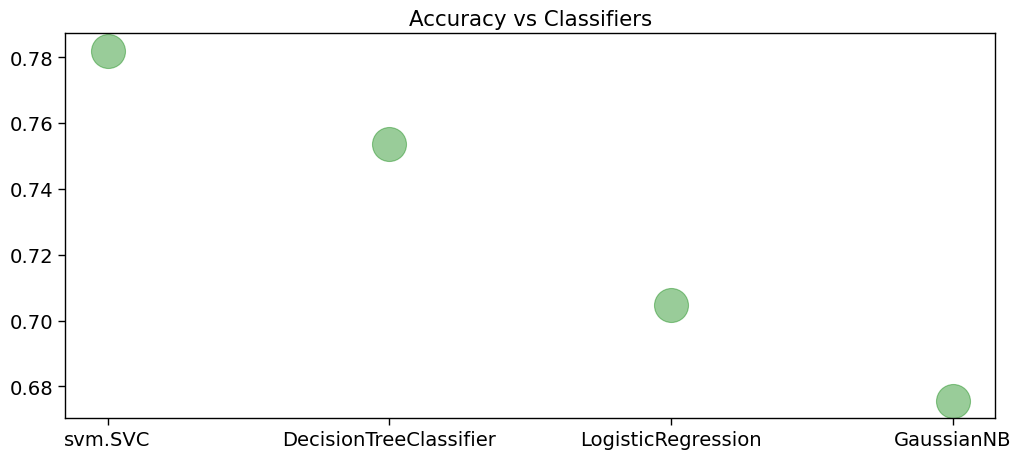

In [111]:
plt.figure(figsize=(12,5))
sns.set_context("paper", font_scale=1.6)
plt.scatter(classifiers, accuracies, s=600, c="green", alpha=0.4)
plt.title('Accuracy vs Classifiers')
plt.show()

In [112]:
## Prediction on entire dataset based on the KNeighborsClassifier model

preds = clf.predict(X)
df1['predicted_hospital_category'] = preds

In [113]:
df1.head(50)

,address,business_id,city,latitude,longitude,name,postal_code,review_count,business_ratings,state,...,text,checkins,cleaned_text,user_ratings,polarity,csat,nps,tip_sentiment_score,hospital_category,predicted_hospital_category
0,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,-0.959821,2.5,PA,...,Great job of adjusting glasses.,-0.145339,Great job adjusting glass,2.62,0.88,0.0,-100.0,0.0,Good,Good
1,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,-0.959821,2.5,PA,...,After purchasing two pairs of glasses at the L...,-0.145339,purchasing two pair glass LensCrafters Plymout...,2.62,0.88,0.0,-100.0,0.0,Good,Good
2,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,-0.959821,2.5,PA,...,I actually had a great experience at this lens...,-0.145339,actually great experience lenscrafters context...,2.62,0.88,0.0,-100.0,0.0,Good,Good
3,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,-0.959821,2.5,PA,...,I originally had an eye exam at KOP Lenscrafte...,-0.145339,originally eye exam KOP Lenscrafters bought fr...,2.62,0.88,0.0,-100.0,0.0,Good,Good
4,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,-0.959821,2.5,PA,...,Today was the second terrible experience I've ...,-0.145339,Today second terrible experience Ive schedulin...,2.62,0.88,0.0,-100.0,0.0,Good,Good
5,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,-0.959821,2.5,PA,...,It's not LensCrafters in general it's this par...,-0.145339,LensCrafters general particular LensCrafters t...,2.62,0.88,0.0,-100.0,0.0,Good,Good
6,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,-0.959821,2.5,PA,...,"Let me start with the goods, the associate who...",-0.145339,Let start good associate welcomed u store nice...,2.62,0.88,0.0,-100.0,0.0,Good,Good
7,"1150 Plymouth Meeting Mall, Ste 2230",DQ7PyYlp2bX96WZa7TcaWQ,Plymouth Meeting,40.116179,-75.282525,LensCrafters,19462,-0.959821,2.5,PA,...,I've called twice today just to ask a simple q...,-0.145339,Ive called twice today ask simple question tim...,2.62,0.88,0.0,-100.0,0.0,Good,Good
8,"79 Route 73, Ste 6, Coopers Plaza",H0NEOp4e3Zu598u6kO3y0g,Voorhees,39.824552,-74.929032,America's Best Contacts & Eyeglasses,08043,0.926111,3.5,NJ,...,I went in 30 mins before close. I was quoted a...,-0.613901,went min close quoted short wait time However ...,3.94,1.00,0.0,0.0,0.0,Excellent,Excellent
9,"79 Route 73, Ste 6, Coopers Plaza",H0NEOp4e3Zu598u6kO3y0g,Voorhees,39.824552,-74.929032,America's Best Contacts & Eyeglasses,08043,0.926111,3.5,NJ,...,Very happy I chose this place for an eye exam!...,-0.613901,happy chose place eye exam script ophthalmolog...,3.94,1.00,0.0,0.0,0.0,Excellent,Excellent


In [125]:
df1=df2.drop_duplicates()

In [192]:
df1['csat'].value_counts()

csat
0.0      5353
100.0     611
Name: count, dtype: int64

In [130]:
from textblob import TextBlob

In [131]:
# Perform sentiment analysis
df1['sentiment_score'] = df1['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Display the DataFrame
# print(df1.head())

# Display sentiment distribution
print("\
Sentiment Distribution:")
print(df1['sentiment_score'].describe())

# Categorize sentiments
df1['sentiment_category'] = pd.cut(df1['sentiment_score'], 
                                  bins=[-1, -0.1, 0.1, 1], 
                                  labels=['Negative', 'Neutral', 'Positive'])

print("\Sentiment Categories:")
print(df1['sentiment_category'].value_counts(normalize=True))

Sentiment Distribution:
count    5964.000000
mean        0.098770
std         0.263471
min        -1.000000
25%        -0.047594
50%         0.098512
75%         0.266742
max         1.000000
Name: sentiment_score, dtype: float64
\Sentiment Categories:
sentiment_category
Positive    0.496128
Neutral     0.319192
Negative    0.184680
Name: proportion, dtype: float64


C:\Users\Kunal Karne\AppData\Local\Temp\ipykernel_17296\1756154211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sentiment_score'] = df1['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
C:\Users\Kunal Karne\AppData\Local\Temp\ipykernel_17296\1756154211.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sentiment_category'] = pd.cut(df1['sentiment_score'],


In [128]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [144]:
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [247]:
import spacy

# Load a SpaCy language model
nlp = spacy.load('en_core_web_sm')  # or any other model


In [139]:
from nltk import ngrams
import nltk
import pandas as pd
from collections import Counter
from tabulate import tabulate

def get_themes_with_ngrams(text):
    words = nltk.word_tokenize(text.lower())
    bigrams = [' '.join(bigram) for bigram in ngrams(words, 2)]
    themes = Counter(bigrams)
    return themes

def analyze_brand_with_ngrams(df, brand_name):
    brand_df = df[df['name'].str.contains(brand_name, case=False, na=False)]
    
    def analyze_group(group):
        themes = get_themes_with_ngrams(' '.join(group['cleaned_text']))
        top_themes = themes.most_common(20)
        positive_themes = [theme for theme, count in top_themes if group['sentiment_score'].mean() > 0]
        negative_themes = [theme for theme, count in top_themes if group['sentiment_score'].mean() <= 0]
        return pd.Series({
            'address': group['address'].iloc[0],
            'postal_code': group['postal_code'].iloc[0],
            'business_ratings': round(group['business_ratings'].mean(), 2),
            'strengths': ', '.join(positive_themes[:3]),
            'areas_for_improvement': ', '.join(negative_themes[:3])
        })
    
    brand_insights = brand_df.groupby('business_id').apply(analyze_group)
    brand_insights = brand_insights.reset_index(drop=True)
    
    if brand_insights.empty:
        print(f"\nNo data available for {brand_name}.")
        return brand_insights
    
    print(tabulate(brand_insights, headers='keys', tablefmt='pipe', showindex=False))
    
    print(f"\nTotal {brand_name} locations analyzed: {len(brand_insights)}")
    print(f"Average business rating: {brand_insights['business_ratings'].mean():.2f}")
    
    # Check if business_ratings column is empty before finding max/min
    if not brand_insights['business_ratings'].isna().all():
        highest_rated_location = brand_insights.loc[brand_insights['business_ratings'].idxmax(), 'address']
        highest_rating = brand_insights['business_ratings'].max()
        print(f"Highest rated location: {highest_rated_location} (Rating: {highest_rating})")
        
        lowest_rated_location = brand_insights.loc[brand_insights['business_ratings'].idxmin(), 'address']
        lowest_rating = brand_insights['business_ratings'].min()
        print(f"Lowest rated location: {lowest_rated_location} (Rating: {lowest_rating})")
    else:
        print("No valid business ratings available to determine highest and lowest rated locations.")
    
    all_strengths = ', '.join(brand_insights['strengths'].dropna())
    all_improvements = ', '.join(brand_insights['areas_for_improvement'].dropna())
    
    print("\nCommon strengths across all locations:")
    print(', '.join(sorted(set(all_strengths.split(', ')))[:9]))  # Top 9 unique strengths
    
    print("\nCommon areas for improvement across all locations:")
    print(', '.join(sorted(set(all_improvements.split(', ')))[:9]))  # Top 9 unique areas for improvement
    
    return brand_insights

# Analyze the brand with bigrams (e.g., 'CVS Pharmacy')
brand_insights_bigrams = analyze_brand_with_ngrams(df1, 'CVS Pharmacy')

print("\nAnalysis with bigrams only complete. Ready for further instructions.")


| address                                            |   postal_code |   business_ratings | strengths                                                   | areas_for_improvement                                   |
|:---------------------------------------------------|--------------:|-------------------:|:------------------------------------------------------------|:--------------------------------------------------------|
| 700 Broad St                                       |         08077 |                2.5 | nothing really, typical everyday, everyday cvs              |                                                         |
| 101 N Oxford Valley Rd                             |         19067 |                1.5 | customer service, toilet paper, paper soap                  |                                                         |
| 700 PA-113                                         |         18964 |                2   | friendly staff, prescription filled, customer service       

In [141]:
import nltk
from nltk import ngrams
import pandas as pd
from collections import Counter
from tabulate import tabulate

# Ensure you have the necessary NLTK packages
nltk.download('punkt')

def get_themes_with_ngrams(text):
    # Tokenize the text and convert to lowercase
    words = nltk.word_tokenize(text.lower())
    # Generate bigrams
    bigrams = [' '.join(bigram) for bigram in ngrams(words, 2)]
    # Count the frequency of each bigram
    themes = Counter(bigrams)
    return themes

def analyze_brand_with_ngrams(df, brand_name):
    # Filter the DataFrame for the specific brand
    brand_df = df[df['name'].str.contains(brand_name, case=False, na=False)]
    
    def analyze_group(group):
        # Generate themes using bigrams from the 'cleaned_text' column
        themes = get_themes_with_ngrams(' '.join(group['cleaned_text']))
        # Get the top 20 most common bigrams
        top_themes = themes.most_common(20)
        
        # Split themes based on sentiment score
        positive_themes = [theme for theme, count in top_themes if group['sentiment_score'].mean() > 0]
        negative_themes = [theme for theme, count in top_themes if group['sentiment_score'].mean() <= 0]
        
        return pd.Series({
            'address': group['address'].iloc[0],
            'postal_code': group['postal_code'].iloc[0],
            'business_ratings': round(group['business_ratings'].mean(), 2),
            'strengths': ', '.join(positive_themes[:3]),
            'areas_for_improvement': ', '.join(negative_themes[:3])
        })
    
    # Apply the analysis to each business ID
    brand_insights = brand_df.groupby('business_id').apply(analyze_group)
    brand_insights = brand_insights.reset_index(drop=True)
    
    # Check if the DataFrame is empty
    if brand_insights.empty:
        print(f"\nNo data available for {brand_name}.")
        return brand_insights
    
    # Display the results in a table format
    print(tabulate(brand_insights, headers='keys', tablefmt='pipe', showindex=False))
    
    # Display summary statistics
    print(f"\nTotal {brand_name} locations analyzed: {len(brand_insights)}")
    print(f"Average business rating: {brand_insights['business_ratings'].mean():.2f}")
    
    # Check for the highest and lowest rated locations
    if not brand_insights['business_ratings'].isna().all():
        highest_rated_location = brand_insights.loc[brand_insights['business_ratings'].idxmax(), 'address']
        highest_rating = brand_insights['business_ratings'].max()
        print(f"Highest rated location: {highest_rated_location} (Rating: {highest_rating})")
        
        lowest_rated_location = brand_insights.loc[brand_insights['business_ratings'].idxmin(), 'address']
        lowest_rating = brand_insights['business_ratings'].min()
        print(f"Lowest rated location: {lowest_rated_location} (Rating: {lowest_rating})")
    else:
        print("No valid business ratings available to determine highest and lowest rated locations.")
    
    # Aggregate all strengths and areas for improvement
    all_strengths = ', '.join(brand_insights['strengths'].dropna())
    all_improvements = ', '.join(brand_insights['areas_for_improvement'].dropna())
    
    # Display common strengths and areas for improvement
    print("\nCommon strengths across all locations:")
    print(', '.join(sorted(set(all_strengths.split(', ')))[:9]))  # Top 9 unique strengths
    
    print("\nCommon areas for improvement across all locations:")
    print(', '.join(sorted(set(all_improvements.split(', ')))[:9]))  # Top 9 unique areas for improvement
    
    return brand_insights

# Analyze the brand with bigrams (e.g., 'CVS Pharmacy')
brand_insights_bigrams = analyze_brand_with_ngrams(df1, 'CVS Pharmacy')

print("\nAnalysis with bigrams only complete. Ready for further instructions.")


[nltk_data] Downloading package punkt to C:\Users\Kunal
[nltk_data]     Karne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


| address                                            |   postal_code |   business_ratings | strengths                                                   | areas_for_improvement                                   |
|:---------------------------------------------------|--------------:|-------------------:|:------------------------------------------------------------|:--------------------------------------------------------|
| 700 Broad St                                       |         08077 |                2.5 | nothing really, typical everyday, everyday cvs              |                                                         |
| 101 N Oxford Valley Rd                             |         19067 |                1.5 | customer service, toilet paper, paper soap                  |                                                         |
| 700 PA-113                                         |         18964 |                2   | friendly staff, prescription filled, customer service       

In [149]:
import nltk
from nltk import ngrams
import pandas as pd
from collections import Counter
from tabulate import tabulate

# Ensure you have the necessary NLTK packages
nltk.download('punkt')

def get_themes_with_ngrams(text):
    words = nltk.word_tokenize(text.lower())
    bigrams = [' '.join(bigram) for bigram in ngrams(words, 2)]
    themes = Counter(bigrams)
    return themes

def analyze_pharmacy_improvements(df, brand_name):
    # Filter the DataFrame for the specific pharmacy
    pharmacy_df = df[df['name'].str.contains(brand_name, case=False, na=False)]
    
    def analyze_group(group):
        themes = get_themes_with_ngrams(' '.join(group['cleaned_text']))
        top_themes = themes.most_common(20)
        
        # Focus only on negative themes
        negative_themes = [theme for theme, count in top_themes if group['sentiment_score'].mean() <= 0]
        
        return pd.Series({
            'business_id': group['business_id'].iloc[0],
            'name': group['name'].iloc[0],
            'areas_for_improvement': ', '.join(negative_themes[:3])
        })
    
    # Apply the analysis to each business ID
    improvement_insights = pharmacy_df.groupby('business_id').apply(analyze_group)
    improvement_insights = improvement_insights.reset_index(drop=True)
    
    if improvement_insights.empty:
        print(f"\nNo data available for {brand_name}.")
        return improvement_insights
    
    # Display the results in a table format
    print(tabulate(improvement_insights, headers='keys', tablefmt='pipe', showindex=False))
    
    # Aggregate and display common areas for improvement
    all_improvements = ', '.join(improvement_insights['areas_for_improvement'].dropna())
    print("\nCommon areas for improvement across all locations:")
    print(', '.join(sorted(set(all_improvements.split(', ')))[:9]))  # Top 9 unique areas for improvement
    
    return improvement_insights

# Example usage for generating a report on CVS Pharmacy
pharmacy_improvements_report = analyze_pharmacy_improvements(df1, 'CVS Pharmacy')

print("\nImprovement report generation complete.")


[nltk_data] Downloading package punkt to C:\Users\Kunal
[nltk_data]     Karne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


| business_id            | name         | areas_for_improvement                                   |
|:-----------------------|:-------------|:--------------------------------------------------------|
| -6E_cla4lotruNasIsCkxQ | CVS Pharmacy |                                                         |
| -OzvKV3hZzpANLUzpA8E3g | CVS Pharmacy |                                                         |
| -VBV5IFRw2cggnsVhEkVkw | CVS Pharmacy |                                                         |
| -j01l0KPJ7kFFq2hMyx_eQ | CVS Pharmacy | many people, customer service, told u                   |
| 0-2DF7wre9-4Y8PoQEaAcQ | CVS Pharmacy |                                                         |
| 09nu102ePMeuThC1Xi_TPQ | CVS Pharmacy | multiple time, lady spoke, second lady                  |
| 0VObIROMCA3EeiV0dx9GJQ | CVS Pharmacy |                                                         |
| 1OACP9F07jbJNcTfo75L_w | CVS Pharmacy |                                                         |


In [193]:
import nltk
from nltk import ngrams
import pandas as pd
from collections import Counter
from tabulate import tabulate

# Ensure you have the necessary NLTK packages
nltk.download('punkt')

def get_themes_with_ngrams(text):
    words = nltk.word_tokenize(text.lower())
    bigrams = [' '.join(bigram) for bigram in ngrams(words, 2)]
    themes = Counter(bigrams)
    return themes

def analyze_pharmacy_improvements(df):
    # Ensure the 'name' column is present
    if 'name' not in df.columns:
        raise ValueError("DataFrame must contain a 'name' column.")
    
    def analyze_group(group):
        themes = get_themes_with_ngrams(' '.join(group['cleaned_text']))
        top_themes = themes.most_common(20)
        
        # Focus only on negative themes
        negative_themes = [theme for theme, count in top_themes if group['sentiment_score'].mean() <= 0]
        
        return pd.Series({
            'name': group['name'].iloc[0],
            'areas_for_improvement': ', '.join(negative_themes[:])
        })
    
    # Apply the analysis to each name
    improvement_insights = df.groupby('name').apply(analyze_group)
    improvement_insights = improvement_insights.reset_index(drop=True)
    
    if improvement_insights.empty:
        print("\nNo data available.")
        return improvement_insights
    
    # Display the results in a table format
    print(tabulate(improvement_insights, headers='keys', tablefmt='pipe', showindex=False))
    
    # Aggregate and display common areas for improvement across all names
    all_improvements = ', '.join(improvement_insights['areas_for_improvement'].dropna())
    print("\nCommon areas for improvement across all names:")
    print(', '.join(sorted(set(all_improvements.split(', ')))[:9]))  # Top 9 unique areas for improvement
    
    return improvement_insights

# Example usage for generating a report on all pharmacies
pharmacy_improvements_report = analyze_pharmacy_improvements(df1)

print("\nImprovement report generation complete.")


[nltk_data] Downloading package punkt to C:\Users\Kunal
[nltk_data]     Karne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


| name                                 | areas_for_improvement   |
|:-------------------------------------|:------------------------|
| America's Best Contacts & Eyeglasses |                         |
| Aspen Dental                         |                         |
| CVS Pharmacy                         |                         |
| Labcorp                              |                         |
| LensCrafters                         |                         |
| MyEyeDr                              |                         |
| Pearle Vision                        |                         |
| Quest Diagnostics                    |                         |
| Target Optical                       |                         |
| The Joint Chiropractic               |                         |

Common areas for improvement across all names:


Improvement report generation complete.


In [165]:
df1[['name','sentiment_score']]

,name,sentiment_score
0,LensCrafters,0.800000
1,LensCrafters,0.378571
2,LensCrafters,0.250386
3,LensCrafters,0.291942
4,LensCrafters,-0.189697
...,...,...
10494,Quest Diagnostics,0.179387
10495,Quest Diagnostics,0.616667
10496,Quest Diagnostics,0.251563
10497,Quest Diagnostics,0.246604


In [166]:
df1.groupby('name')['sentiment_score'].mean()

name
America's Best Contacts & Eyeglasses    0.172128
Aspen Dental                            0.115975
CVS Pharmacy                            0.058421
Labcorp                                 0.043548
LensCrafters                            0.125561
MyEyeDr                                 0.178083
Pearle Vision                           0.151597
Quest Diagnostics                       0.084728
Target Optical                          0.202520
The Joint Chiropractic                  0.299988
Name: sentiment_score, dtype: float64

In [216]:
df1 = df1.drop(columns=['business_name'])

In [233]:
import pandas as pd
import nltk
from nltk.corpus import wordnet
from collections import Counter
from tabulate import tabulate

# Ensure necessary NLTK data is downloaded
nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('wordnet', quiet=True)

def get_wordnet_pos(word):
    """Map POS tag to first character used by WordNet"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def get_themes(text):
    words = nltk.word_tokenize(text.lower())
    themes = []
    for word in words:
        synsets = wordnet.synsets(word, pos=get_wordnet_pos(word))
        if synsets:
            themes.append(synsets[0].lemma_names()[0])
    return Counter(themes)

def calculate_csat(sentiment_score):
    """Example CSAT calculation: Percentage of positive sentiment scores."""
    positive_reviews = sentiment_score[sentiment_score > 0].count()
    total_reviews = sentiment_score.count()
    return (positive_reviews / total_reviews) * 100

def calculate_nps(sentiment_score):
    """Example NPS calculation: Promoters (9-10) - Detractors (0-6)."""
    promoters = sentiment_score[sentiment_score >= 9].count()
    detractors = sentiment_score[sentiment_score <= 6].count()
    total_responses = sentiment_score.count()
    return ((promoters - detractors) / total_responses) * 100

def analyze_brand(df, brand_name):
    # Filter for the specified brand locations
    brand_df = df[df['name'].str.contains(brand_name, case=False, na=False)]
    
    def analyze_group(group):
        themes = get_themes(' '.join(group['cleaned_text']))
        top_themes = themes.most_common(20)
        
        positive_themes = [theme for theme, count in top_themes if group['sentiment_score'].mean() > 0]
        negative_themes = [theme for theme, count in top_themes if group['sentiment_score'].mean() <= 0]
        
        return pd.Series({
            'name': group['name'].iloc[0],
            'address': group['address'].iloc[0],
            'postal_code': group['postal_code'].iloc[0],
            'business_ratings': round(group['business_ratings'].mean(), 2),
            'csat': calculate_csat(group['sentiment_score']),
            'nps': calculate_nps(group['sentiment_score']),
            'strengths': ', '.join(positive_themes[:3]),
            'areas_for_improvement': ', '.join(negative_themes[:3])
        })
    
    # Apply the analysis to each group
    brand_insights = brand_df.groupby('business_id').apply(analyze_group)
    
    # Reset index to make business_id a column
    brand_insights = brand_insights.reset_index()
    
    # Display the results in a tabular format
    print(tabulate(brand_insights, headers='keys', tablefmt='pipe', showindex=False))
    
    # Print summary statistics
    print(f"\nTotal {brand_name} locations analyzed: {len(brand_insights)}")
    print(f"Average business rating: {brand_insights['business_ratings'].mean():.2f}")
    print(f"Highest rated location: {brand_insights.loc[brand_insights['business_ratings'].idxmax(), 'address']} (Rating: {brand_insights['business_ratings'].max()})")
    print(f"Lowest rated location: {brand_insights.loc[brand_insights['business_ratings'].idxmin(), 'address']} (Rating: {brand_insights['business_ratings'].min()})")
    
    # Aggregate strengths and areas for improvement
    all_strengths = ', '.join(brand_insights['strengths'].dropna())
    all_improvements = ', '.join(brand_insights['areas_for_improvement'].dropna())
    
    print("\nCommon strengths across all locations:")
    print(', '.join(sorted(set(all_strengths.split(', ')))[:9]))  # Top 9 unique strengths
    
    print("\nCommon areas for improvement across all locations:")
    print(', '.join(sorted(set(all_improvements.split(', ')))[:9]))  # Top 9 unique areas for improvement
    
    return brand_insights

In [237]:
import pandas as pd
import nltk
from nltk.corpus import wordnet
from collections import Counter
from tabulate import tabulate

# Ensure necessary NLTK data is downloaded
nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('wordnet', quiet=True)

def get_wordnet_pos(word):
    """Map POS tag to first character used by WordNet"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def get_themes(text):
    words = nltk.word_tokenize(text.lower())
    themes = []
    for word in words:
        synsets = wordnet.synsets(word, pos=get_wordnet_pos(word))
        if synsets:
            themes.append(synsets[0].lemma_names()[0])
    return Counter(themes)

def calculate_csat(sentiment_score):
    """Example CSAT calculation: Percentage of positive sentiment scores."""
    positive_reviews = sentiment_score[sentiment_score > 0].count()
    total_reviews = sentiment_score.count()
    return (positive_reviews / total_reviews) * 100

def calculate_nps(sentiment_score):
    """Example NPS calculation: Promoters (9-10) - Detractors (0-6)."""
    promoters = sentiment_score[sentiment_score >= 9].count()
    detractors = sentiment_score[sentiment_score <= 6].count()
    total_responses = sentiment_score.count()
    return ((promoters - detractors) / total_responses) * 100

def analyze_business(df):
    def analyze_group(group):
        themes = get_themes(' '.join(group['cleaned_text']))
        top_themes = themes.most_common(20)
        
        positive_themes = [theme for theme, count in top_themes if group['sentiment_score'].mean() > 0]
        negative_themes = [theme for theme, count in top_themes if group['sentiment_score'].mean() <= 0]
        
        return pd.Series({
            'business_id': group['business_id'].iloc[0],
            'name': group['name'].iloc[0],
            'address': group['address'].iloc[0],
            'postal_code': group['postal_code'].iloc[0],
            'business_ratings': round(group['business_ratings'].mean(), 2),
            'csat': calculate_csat(group['sentiment_score']),
            'nps': calculate_nps(group['sentiment_score']),
            'strengths': ', '.join(positive_themes[:3]),
            'areas_for_improvement': ', '.join(negative_themes[:3])
        })
    
    # Apply the analysis to each group (grouping by business_id)
    business_insights = df.groupby('business_id').apply(analyze_group)
    
    # Reset index to make business_id a column
    business_insights = business_insights.reset_index(drop=True)
    
    # Display the results in a tabular format
    print(tabulate(business_insights, headers='keys', tablefmt='pipe', showindex=False))
    
    # Print summary statistics
    print(f"\nTotal businesses analyzed: {len(business_insights)}")
    print(f"Average business rating: {business_insights['business_ratings'].mean():.2f}")
    print(f"Highest rated location: {business_insights.loc[business_insights['business_ratings'].idxmax(), 'address']} (Rating: {business_insights['business_ratings'].max()})")
    print(f"Lowest rated location: {business_insights.loc[business_insights['business_ratings'].idxmin(), 'address']} (Rating: {business_insights['business_ratings'].min()})")
    
    # Aggregate strengths and areas for improvement
    all_strengths = ', '.join(business_insights['strengths'].dropna())
    all_improvements = ', '.join(business_insights['areas_for_improvement'].dropna())
    
    print("\nCommon strengths across all locations:")
    print(', '.join(sorted(set(all_strengths.split(', ')))[:9]))  # Top 9 unique strengths
    
    print("\nCommon areas for improvement across all locations:")
    print(', '.join(sorted(set(all_improvements.split(', ')))[:9]))  # Top 9 unique areas for improvement
    
    return business_insights




In [239]:
import pandas as pd
import mysql.connector
from mysql.connector import Error

def create_database_and_table(cursor):
    cursor.execute("CREATE DATABASE IF NOT EXISTS brand_analysis;")
    cursor.execute("USE brand_analysis;")
    
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS brand_insights (
        business_id VARCHAR(255) PRIMARY KEY,
        name TEXT,
        address TEXT,
        postal_code VARCHAR(10),
        business_ratings FLOAT,
        csat FLOAT,
        nps FLOAT,
        strengths TEXT,
        areas_for_improvement TEXT
    );
    """)

def insert_data_to_mysql(connection, cursor, df):
    insert_query = """
    INSERT INTO brand_insights (
        business_id, name, address, postal_code, business_ratings, csat, nps, strengths, areas_for_improvement
    ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)
    ON DUPLICATE KEY UPDATE
        name=VALUES(name),
        address=VALUES(address),
        postal_code=VALUES(postal_code),
        business_ratings=VALUES(business_ratings),
        csat=VALUES(csat),
        nps=VALUES(nps),
        strengths=VALUES(strengths),
        areas_for_improvement=VALUES(areas_for_improvement);
    """

    for i, row in df.iterrows():
        cursor.execute(insert_query, (
            row['business_id'], row['name'], row['address'], row['postal_code'], row['business_ratings'],
            row['csat'], row['nps'], row['strengths'], row['areas_for_improvement']
        ))
    connection.commit()

# Connect to MySQL database
try:
    connection = mysql.connector.connect(
        host='localhost',
        user='root',
        password='123456'
    )
    if connection.is_connected():
        cursor = connection.cursor()
        create_database_and_table(cursor)
        
        # Load your DataFrame (replace this with actual loading method)
        # df1 = pd.read_csv('your_data.csv')  # Example loading code
        
        # Process each unique brand name in the 'name' column
        unique_brands = df1['name'].dropna().unique()
        
        for brand in unique_brands:
            print(f"Analyzing brand: {brand}")
            brand_insights = analyze_brand(df1, brand)
            
            # Insert data into MySQL
            insert_data_to_mysql(connection, cursor, brand_insights)
        
        print("Data inserted successfully for all brands!")

except Error as e:
    print(f"Error: {e}")

finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed.")


Analyzing brand: LensCrafters
| business_id            | name         | address                                | postal_code   |   business_ratings |     csat |   nps | strengths               | areas_for_improvement   |
|:-----------------------|:-------------|:---------------------------------------|:--------------|-------------------:|---------:|------:|:------------------------|:------------------------|
| 0aIKoF0XMhNJw1aOWU-nRA | LensCrafters | 7802 Citrus Park Town Center Mall      | 33625         |                2   |  57.1429 |  -100 | get, travel, doctor     |                         |
| 0z2hoFgk7-XFsLTuUG6Axg | LensCrafters | 1024 Glenbrook Way                     | 37075         |                2.5 |  58.3333 |  -100 | get, travel, time       |                         |
| 1nTLeGpSUm_M7Gic40-28Q | LensCrafters | 8882 170th Street                      | T5T 4M2       |                2   |  57.1429 |  -100 | glass, travel, truly    |                         |
| 3nlKbI1503tTW

In [260]:
df1['business_id'].value_counts()

business_id
xNRcraXS81xS62jz16bXCQ    24
p8j_FQXUkTSSAsJdgHJ-QQ    24
hR4D8XqCbfGmyNxdlg4G5g    22
W0xL1fk3WJqtt90mgP-7WA    22
0aIKoF0XMhNJw1aOWU-nRA    21
                          ..
LqPACrk4tFQWMamIr0l7aw     4
ysxn2qOcDLIjyfNeB6L--g     4
O91cbGhQrtfUwedwjjX5zQ     4
TZMcND9y3EGLjoIfi9_bZQ     4
L8opFBAUCYOynFg7N470NQ     3
Name: count, Length: 613, dtype: int64

In [261]:
# Filter the DataFrame for rows where 'name' is 'CVS Pharmacy'
filtered_df = df1[df1['name'] == 'CVS Pharmacy']

# Get the number of unique 'business_id' values
unique_business_ids = filtered_df['business_id'].nunique()

print(unique_business_ids)


286
